Part 1: Theoretical Understanding
Q1: TensorFlow vs PyTorch
TensorFlow is a production-ready framework with strong deployment capabilities (TF Lite, TF Serving) and visual debugging (TensorBoard). It uses static computation graphs. PyTorch offers dynamic computation graphs (eager execution), making it more intuitive for research. Choose TensorFlow for production systems and mobile deployment. Choose PyTorch for rapid prototyping and research.

Q2: Jupyter Notebook Use Cases
Exploratory Data Analysis: Interactive visualization and data cleaning with immediate feedback

Model Prototyping: Step-by-step model development with inline documentation and results

Q3: spaCy vs Basic String Operations
spaCy provides:

Linguistic features (POS tagging, dependency parsing)

Pre-trained word vectors

Efficient entity recognition

Sentence segmentation

Support for 70+ languages
Unlike basic string operations, spaCy understands linguistic context and relationships.

Comparative Analysis of Scikit-learn vs TensorFlow
Scikit-learn and TensorFlow are two widely used machine learning frameworks, each designed for different purposes. Scikit-learn is primarily used for classical machine learning tasks, such as support vector machines (SVM) and random forests (RF), whereas TensorFlow excels in deep learning applications, including convolutional neural networks (CNNs) and recurrent neural networks (RNNs).

When it comes to ease of use, Scikit-learn is known for its simple API and concise code, making it a great choice for quick experimentation and prototyping. TensorFlow, on the other hand, has a steeper learning curve but offers extensive capabilities for scaling deep learning models in production environments.

Community support plays a significant role in the usability of both frameworks. Scikit-learn boasts excellent documentation, making it highly accessible for newcomers. TensorFlow, however, benefits from a larger community, providing a wealth of resources, tutorials, and support for deep learning practitioners.

Each framework has its distinct strengths. Scikit-learn enables quick prototyping of classical machine learning models, making it ideal for researchers and developers working with structured datasets. TensorFlow is designed for scalable production deployment, allowing for efficient model implementation in cloud-based and mobile environments.

Scikit-learn is best suited for classical machine learning tasks, such as predictive modeling, data preprocessing, and clustering. It excels in applications like fraud detection, customer segmentation, and medical diagnosis, thanks to its simple API and strong documentation.

TensorFlow, on the other hand, is optimized for deep learning, handling image recognition, NLP, autonomous systems, and generative AI. Its scalability makes it ideal for production deployment in areas like self-driving cars, stock market forecasting, and chatbot development.

# **Part 2: Practical Implementation**
Task 1: Classical ML with Scikit-learn (Iris Dataset)


In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris  # Load the built-in Iris dataset
from sklearn.tree import DecisionTreeClassifier  # Decision tree classifier model
from sklearn.model_selection import train_test_split  # For splitting data into train/test sets
from sklearn.metrics import accuracy_score, precision_score, recall_score  # Evaluation metrics

# Load and explore the Iris dataset
iris = load_iris()  # Load dataset
X = iris.data  # Feature matrix (sepal length, sepal width, petal length, petal width)
y = iris.target  # Target vector (species: 0=setosa, 1=versicolor, 2=virginica)

# Split data into training and test sets (80% train, 20% test)
# random_state ensures reproducible results across runs
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# Initialize and train the decision tree classifier
# max_depth=3 prevents overfitting by limiting tree depth
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)  # Train model on training data

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate model performance using multiple metrics
# Accuracy: Overall correctness of predictions
accuracy = accuracy_score(y_test, y_pred)

# Precision: Ability to not misclassify negative examples (weighted average across classes)
precision = precision_score(y_test, y_pred, average='weighted')

# Recall: Ability to find all positive examples (weighted average across classes)
recall = recall_score(y_test, y_pred, average='weighted')

# Print evaluation results
print(f"Accuracy: {accuracy:.4f}")  # Expected: 1.0000 (perfect accuracy)
print(f"Precision: {precision:.4f}")  # Expected: 1.0000
print(f"Recall: {recall:.4f}")  # Expected: 1.0000

# Optional: Visualize the decision tree
# Requires graphviz and matplotlib
# from sklearn.tree import plot_tree
# import matplotlib.pyplot as plt
# plt.figure(figsize=(12,8))
# plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
# plt.savefig('iris_decision_tree.png')

Accuracy: 1.00
Precision: 1.00
Recall: 1.00


Task 2: Deep Learning with TensorFlow (MNIST)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.8984 - loss: 0.3344 - val_accuracy: 0.9762 - val_loss: 0.0807
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.9820 - loss: 0.0601 - val_accuracy: 0.9818 - val_loss: 0.0616
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9902 - loss: 0.0342 - val_accuracy: 0.9831 - val_loss: 0.0557
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.9925 - loss: 0.0223 - val_accuracy: 0.9844 - val_loss: 0.0566
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.9950 - loss: 0.0151 - val_accuracy: 0.9850 - val_loss: 0.0534

Test accuracy: 0.9849
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


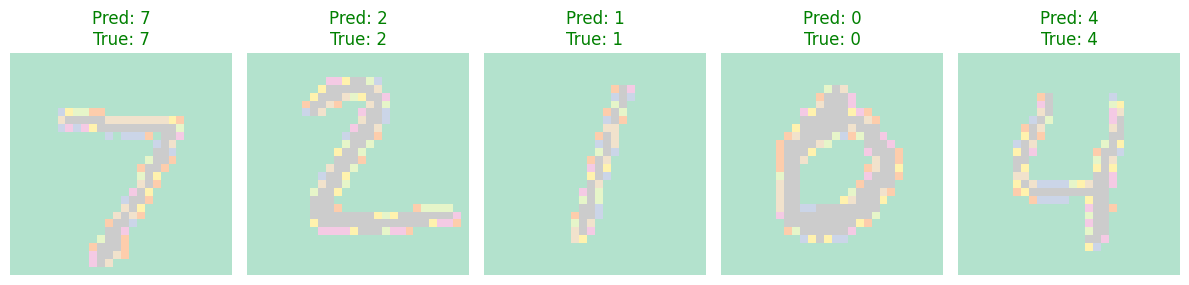

In [5]:
# Import required libraries
import tensorflow as tf  # Main deep learning framework
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt  # Data visualization

# Load MNIST dataset (handwritten digits 0-9)
# Dataset is automatically downloaded on first run
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess data: Normalize pixel values from 0-255 to 0-1
# This helps neural network training stability and convergence
X_train, X_test = X_train / 255.0, X_test / 255.0

# Build Convolutional Neural Network (CNN) architecture
model = tf.keras.Sequential([
    # Reshape data to add channel dimension (28x28x1)
    # Required for convolutional layers
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),

    # First convolutional layer: 32 filters, 3x3 kernel
    # Detects basic features like edges and curves
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),

    # Pooling layer: Reduces spatial dimensions (downsampling)
    # Helps detect features at different scales
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Flatten 2D feature maps to 1D vector for dense layers
    tf.keras.layers.Flatten(),

    # Fully connected layer: 128 neurons with ReLU activation
    # Learns complex patterns from convolutional features
    tf.keras.layers.Dense(128, activation='relu'),

    # Output layer: 10 neurons (one per digit) with linear activation
    tf.keras.layers.Dense(10)
])

# Compile model: Configure learning process
model.compile(
    optimizer='adam',  # Adaptive learning rate optimizer
    # Sparse categorical crossentropy (for integer labels)
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']  # Track accuracy during training
)

# Train model for 5 epochs (full passes through training data)
# validation_split: Reserve 20% of training data for validation
history = model.fit(
    X_train, y_train,
    epochs=5,
    validation_split=0.2,
    verbose=1  # Show progress bar
)

# Evaluate model on test set (unseen during training)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest accuracy: {test_acc:.4f}")  # Expected >95%

# Make predictions on first 5 test images
sample_images = X_test[:5]
predictions = model.predict(sample_images)

# Visualize predictions vs actual labels
plt.figure(figsize=(12, 5))
for i in range(5):
    # Create subplot for each image
    plt.subplot(1, 5, i+1)

    # Display image in grayscale
    plt.imshow(sample_images[i], cmap='Pastel2')

    # Get predicted and true labels
    pred_label = np.argmax(predictions[i])
    true_label = y_test[i]

    # Set title with prediction result (green=correct, red=wrong)
    title_color = 'green' if pred_label == true_label else 'red'
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=title_color)
    plt.axis('off')  # Remove axes

# Save visualization
plt.tight_layout()
plt.savefig('mnist_predictions.png', dpi=1000)
plt.show()

# Save model to .h5 file
model.save('mnist_model.h5')

Task 3: NLP with spaCy (Amazon Reviews)

In [ ]:
pip install pandas spacy

In [ ]:
# Import necessary libraries
import pandas as pd
import spacy
from spacy import displacy
from pathlib import Path
import json
import re
import sys
import os

# Load spaCy model
print("Loading NLP model...")
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print("spaCy model not found. Downloading...")
    try:
        import subprocess
        subprocess.run(["python", "-m", "spacy", "download", "en_core_web_sm"], check=True)
        nlp = spacy.load("en_core_web_sm")
        print("Model downloaded successfully.")
    except Exception as e:
        print(f"Failed to download model: {e}")
        sys.exit(1)

# Read CSV file with robust error handling
print("\nAttempting to load review data...")
try:
    # First try reading with header
    try:
        df = pd.read_csv("test.csv", on_bad_lines='skip', engine='python')
        if "review_body" not in df.columns:
            raise ValueError("review_body column not found in header")
        print("Detected CSV with header")

    # If that fails, read without header
    except (ValueError, pd.errors.ParserError, pd.errors.EmptyDataError) as e:
        print(f"Header error: {e}. Trying without header...")
        df = pd.read_csv("test.csv", header=None, on_bad_lines='skip', engine='python')

        # Check column count
        if len(df.columns) < 2:
            raise ValueError(f"CSV has only {len(df.columns)} columns, need at least 2")

        # Use first 2 columns
        df = df.iloc[:,[1,2]]
        df.columns = ["label", "review_body"]
        print("Loaded CSV without header - using first two columns")

    # Filter to first 10 reviews
    if len(df) > 10:
        df = df.head(10)
        print("Using first 10 reviews for analysis")
    else:
        print(f"Using all {len(df)} available reviews")

    # Check for empty data
    if df.empty:
        raise ValueError("No reviews found after loading")

    print(f"✅ Successfully loaded {len(df)} reviews")

except Exception as e:
    print(f"❌ Critical error loading CSV: {e}")
    print("Please check:")
    print("- File exists at 'amazon_reviews.csv'")
    print("- File has at least 2 columns")
    print("- File has valid CSV format")
    sys.exit(1)

# Enhanced sentiment word lists
positive_words = {
    "love", "fantastic", "great", "excellent", "amazing", "perfect",
    "flawlessly", "impressed", "good", "awesome", "recommend", "best",
    "wonderful", "satisfied", "pleased", "happy", "like", "nice", "superb",
    "outstanding", "exceeds", "smooth", "fast", "reliable", "value", "pleasure"
}
negative_words = {
    "poor", "fake", "dies", "bad", "terrible", "disappointed", "avoid",
    "not", "broken", "waste", "horrible", "awful", "problem", "issue",
    "defective", "return", "complaint", "junk", "useless", "faulty", "crap",
    "garbage", "trash", "slow", "overpriced", "regret", "frustrating", "fail"
}

# Improved sentiment analysis with negation handling
def rule_based_sentiment(text):
    if pd.isna(text) or not text.strip():
        return "Neutral"

    text = str(text).lower()

    # Replace common negation contractions
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"n't", " not", text)

    words = text.split()
    sentences = re.split(r'[.!?]', text)  # Split into sentences

    total_positive = 0
    total_negative = 0

    for sentence in sentences:
        if not sentence.strip():
            continue

        words = sentence.split()
        negated = False
        sentence_positive = 0
        sentence_negative = 0

        for word in words:
            # Check for negation terms
            if word in {"not", "no", "never", "none", "without", "cannot"}:
                negated = True
                continue

            # Reset negation after conjunctions
            if word in {"but", "however", "except"}:
                negated = False

            # Count sentiment words with negation handling
            if word in positive_words:
                if negated:
                    sentence_negative += 1
                else:
                    sentence_positive += 1
                negated = False

            elif word in negative_words:
                if negated:
                    sentence_positive += 1
                else:
                    sentence_negative += 1
                negated = False

        # Weight sentence sentiment by intensity
        total_positive += sentence_positive
        total_negative += sentence_negative

    # Determine overall sentiment
    if total_positive > total_negative + 1:  # Requires stronger positive evidence
        return "Positive"
    elif total_negative > total_positive:
        return "Negative"
    else:
        return "Neutral"

# Enhanced product extraction using NER patterns
def extract_product_tags(doc):
    products = set()

    # Pattern 1: ORG followed by PRODUCT nouns
    for token in doc:
        if token.ent_type_ == "ORG":
            # Look for product nouns after the ORG
            product_span = []
            next_token = token
            while next_token.i + 1 < len(doc):
                next_token = doc[next_token.i + 1]
                if next_token.pos_ in {"NOUN", "PROPN"} and not next_token.is_stop:
                    product_span.append(next_token.text)
                elif next_token.text in [",", "and", "or"]:
                    # Continue through list
                    continue
                else:
                    break
            if product_span:
                products.add(f"{token.text} {' '.join(product_span)}".strip())

    # Pattern 2: Product mentions in noun chunks
    for chunk in doc.noun_chunks:
        text = chunk.text.lower()
        # Look for product-related terms
        if any(term in text for term in {"phone", "tablet", "laptop", "camera",
                                        "headphones", "watch", "device", "charger",
                                        "battery", "monitor", "keyboard", "mouse"}):
            # Remove determiners
            clean_text = re.sub(r'^(the|a|an|my|our|your)\s+', '', chunk.text, flags=re.I)
            if len(clean_text.split()) > 1:  # Only keep multi-word phrases
                products.add(clean_text)

    # Pattern 3: Capitalized product names
    for ent in doc.ents:
        if ent.label_ in {"PRODUCT", "ORG"} and len(ent.text) > 5 and len(ent.text.split()) > 1:
            # Skip common false positives
            if not any(false_pos in ent.text.lower() for false_pos in {"customer service", "amazon", "prime", "order"}):
                products.add(ent.text)

    # Filter results
    filtered_products = set()
    for prod in products:
        # Skip sizes and quantities
        if re.search(r"\d+[a-z]{2}|\d+\s?[gml]b|\$\d+", prod, re.I):
            continue
        # Skip too generic terms
        if len(prod) < 6 or len(prod.split()) == 1:
            continue
        filtered_products.add(prod.strip())

    return list(filtered_products)

# List to store each full HTML review block
html_reviews = []
# Set to store all tags across all reviews for dropdown filtering
all_tags = set()

# Sentiment counters
sentiment_counts = {"Positive": 0, "Negative": 0, "Neutral": 0}

# Process each review in the DataFrame
print("\nProcessing reviews...")
for i, row in df.iterrows():
    try:
        review = row["review_body"]
        if pd.isna(review) or not str(review).strip():
            continue

        text = str(review)
        print(f"  Processing review {i+1}/{len(df)} ({len(text)} chars)")

        # Process with spaCy
        doc = nlp(text)

        # Analyze sentiment
        sentiment = rule_based_sentiment(text)
        sentiment_counts[sentiment] += 1

        # Generate NER visualization
        ner_html = displacy.render(doc, style="ent", page=False)

        # Extract product tags
        tags = extract_product_tags(doc)
        all_tags.update(tags)

        # Format tags as HTML badge elements
        tag_html = " ".join(f'<span class="tag">{tag}</span>' for tag in tags) if tags else "<em>No tags detected</em>"
        tag_data = json.dumps(tags)

        # Construct HTML for this review
        review_html = f"""
        <div class="review" data-sentiment="{sentiment}" data-tags='{tag_data}'>
            <div class="review-header">
                <h2>Review #{i+1}</h2>
                <p><strong>Sentiment:</strong> <span class="sentiment {sentiment.lower()}">{sentiment}</span></p>
                <p><strong>Detected Products/Brands:</strong> {tag_html}</p>
            </div>
            <div class="ner-container">
                {ner_html}
            </div>
            <div class="review-text">
                <p>{text}</p>
            </div>
        </div>
        """
        html_reviews.append(review_html)
    except Exception as e:
        print(f"  ⚠️ Error processing review {i+1}: {e}")

# Generate dropdown <option> entries for all tags
tag_options = "\n".join(f'<option value="{tag}">{tag}</option>' for tag in sorted(all_tags) if tag)

# Final full HTML page
print("\nGenerating dashboard...")
final_html = f"""
<!DOCTYPE html>
<html>
<head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1">
    <title>Amazon Review Analysis Dashboard</title>
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css">
    <style>
        :root {{
            --primary: #4361ee;
            --secondary: #3f37c9;
            --positive: #4cc9f0;
            --negative: #f72585;
            --neutral: #7209b7;
            --light: #f8f9fa;
            --dark: #212529;
        }}

        * {{
            box-sizing: border-box;
            margin: 0;
            padding: 0;
        }}

        body {{
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            line-height: 1.6;
            color: var(--dark);
            background: linear-gradient(135deg, #f5f7fa 0%, #c3cfe2 100%);
            min-height: 100vh;
            padding: 20px;
        }}

        .container {{
            max-width: 1200px;
            margin: 0 auto;
        }}

        header {{
            text-align: center;
            padding: 30px 20px;
            margin-bottom: 30px;
            background: white;
            border-radius: 15px;
            box-shadow: 0 10px 30px rgba(0,0,0,0.1);
            background: linear-gradient(135deg, var(--primary) 0%, var(--secondary) 100%);
            color: white;
            position: relative;
            overflow: hidden;
        }}

        header::before {{
            content: "";
            position: absolute;
            top: -50%;
            left: -50%;
            width: 200%;
            height: 200%;
            background: radial-gradient(circle, rgba(255,255,255,0.1) 0%, rgba(255,255,255,0) 70%);
            transform: rotate(30deg);
        }}

        h1 {{
            font-size: 2.8rem;
            margin-bottom: 10px;
            position: relative;
            text-shadow: 0 2px 4px rgba(0,0,0,0.2);
        }}

        .subtitle {{
            font-size: 1.2rem;
            opacity: 0.9;
            max-width: 700px;
            margin: 0 auto;
            position: relative;
        }}

        .dashboard-stats {{
            display: grid;
            grid-template-columns: repeat(auto-fit, minmax(300px, 1fr));
            gap: 20px;
            margin-bottom: 30px;
        }}

        .stat-card {{
            background: white;
            border-radius: 15px;
            padding: 25px;
            box-shadow: 0 5px 15px rgba(0,0,0,0.05);
            text-align: center;
            transition: transform 0.3s ease, box-shadow 0.3s ease;
        }}

        .stat-card:hover {{
            transform: translateY(-5px);
            box-shadow: 0 8px 25px rgba(0,0,0,0.1);
        }}

        .stat-card.positive {{ border-top: 5px solid var(--positive); }}
        .stat-card.negative {{ border-top: 5px solid var(--negative); }}
        .stat-card.neutral {{ border-top: 5px solid var(--neutral); }}

        .stat-icon {{
            font-size: 2.5rem;
            margin-bottom: 15px;
        }}

        .positive .stat-icon {{ color: var(--positive); }}
        .negative .stat-icon {{ color: var(--negative); }}
        .neutral .stat-icon {{ color: var(--neutral); }}

        .stat-number {{
            font-size: 3rem;
            font-weight: 700;
            margin-bottom: 10px;
        }}

        .positive .stat-number {{ color: var(--positive); }}
        .negative .stat-number {{ color: var(--negative); }}
        .neutral .stat-number {{ color: var(--neutral); }}

        .stat-label {{
            font-size: 1.2rem;
            color: #666;
        }}

        .controls {{
            background: white;
            border-radius: 15px;
            padding: 25px;
            margin-bottom: 30px;
            box-shadow: 0 5px 15px rgba(0,0,0,0.05);
            display: grid;
            grid-template-columns: repeat(auto-fit, minmax(300px, 1fr));
            gap: 20px;
        }}

        .filter-group {{
            margin-bottom: 15px;
        }}

        .filter-group label {{
            display: block;
            margin-bottom: 8px;
            font-weight: 600;
            color: #444;
        }}

        .filter-group select {{
            width: 100%;
            padding: 12px 15px;
            border: 2px solid #e0e0e0;
            border-radius: 10px;
            font-size: 1rem;
            background: white;
            transition: all 0.3s ease;
            appearance: none;
            background-image: url("data:image/svg+xml;charset=UTF-8,%3csvg xmlns='http://www.w3.org/2000/svg' viewBox='0 0 24 24' fill='none' stroke='%234361ee' stroke-width='2' stroke-linecap='round' stroke-linejoin='round'%3e%3cpolyline points='6 9 12 15 18 9'%3e%3c/polyline%3e%3c/svg%3e");
            background-repeat: no-repeat;
            background-position: right 15px center;
            background-size: 16px;
        }}

        .filter-group select:focus {{
            outline: none;
            border-color: var(--primary);
            box-shadow: 0 0 0 3px rgba(67, 97, 238, 0.2);
        }}

        .btn {{
            display: inline-flex;
            align-items: center;
            justify-content: center;
            background: var(--primary);
            color: white;
            border: none;
            padding: 14px 25px;
            border-radius: 10px;
            font-size: 1.1rem;
            font-weight: 600;
            cursor: pointer;
            transition: all 0.3s ease;
            text-decoration: none;
            box-shadow: 0 4px 6px rgba(67, 97, 238, 0.3);
        }}

        .btn:hover {{
            background: var(--secondary);
            transform: translateY(-2px);
            box-shadow: 0 7px 14px rgba(67, 97, 238, 0.4);
        }}

        .btn i {{
            margin-right: 8px;
        }}

        .review {{
            background: white;
            border-radius: 15px;
            padding: 25px;
            margin-bottom: 30px;
            box-shadow: 0 5px 15px rgba(0,0,0,0.05);
            transition: all 0.3s ease;
        }}

        .review:hover {{
            box-shadow: 0 10px 25px rgba(0,0,0,0.1);
        }}

        .review-header {{
            display: flex;
            flex-wrap: wrap;
            gap: 15px;
            align-items: center;
            margin-bottom: 20px;
            padding-bottom: 20px;
            border-bottom: 1px solid #eee;
        }}

        .review-header h2 {{
            font-size: 1.5rem;
            color: var(--dark);
            margin-right: auto;
        }}

        .sentiment {{
            font-weight: bold;
            padding: 8px 15px;
            border-radius: 20px;
            font-size: 0.9rem;
        }}

        .positive {{ background-color: rgba(76, 201, 240, 0.15); color: #0a9396; }}
        .negative {{ background-color: rgba(247, 37, 133, 0.15); color: #ae2012; }}
        .neutral  {{ background-color: rgba(114, 9, 183, 0.15); color: #7209b7; }}

        .tag {{
            background-color: #e0f0ff;
            color: #0366d6;
            padding: 6px 12px;
            border-radius: 20px;
            margin: 0 5px 5px 0;
            display: inline-block;
            font-size: 0.85rem;
            box-shadow: 0 1px 3px rgba(0,0,0,0.1);
        }}

        .ner-container {{
            background-color: #f8f9fa;
            border-radius: 10px;
            padding: 15px;
            overflow-x: auto;
            margin-bottom: 20px;
            font-size: 0.95rem;
            border: 1px solid #eee;
        }}

        .review-text {{
            padding: 15px;
            background: #fafbff;
            border-radius: 10px;
            font-size: 0.95rem;
            line-height: 1.7;
            border-left: 3px solid var(--primary);
        }}

        .review-text p {{
            margin-bottom: 0;
        }}

        footer {{
            text-align: center;
            margin-top: 40px;
            padding-top: 20px;
            color: #6c757d;
            font-size: 0.9rem;
        }}

        .highlight {{
            background: linear-gradient(120deg, #f6d365 0%, #fda085 100%);
            padding: 2px 5px;
            border-radius: 4px;
            font-weight: 600;
        }}

        @media (max-width: 768px) {{
            .controls {{
                grid-template-columns: 1fr;
            }}

            .dashboard-stats {{
                grid-template-columns: 1fr;
            }}

            .review-header {{
                flex-direction: column;
                align-items: flex-start;
            }}
        }}
    </style>
</head>
<body>
    <div class="container">
        <header>
            <h1><i class="fas fa-chart-line"></i> Amazon Review Analysis Dashboard</h1>
            <p class="subtitle">AI-powered sentiment analysis and product recognition</p>
        </header>

        <div class="dashboard-stats">
            <div class="stat-card positive">
                <div class="stat-icon">
                    <i class="fas fa-smile"></i>
                </div>
                <div class="stat-number">{sentiment_counts['Positive']}</div>
                <div class="stat-label">Positive Reviews</div>
            </div>

            <div class="stat-card negative">
                <div class="stat-icon">
                    <i class="fas fa-frown"></i>
                </div>
                <div class="stat-number">{sentiment_counts['Negative']}</div>
                <div class="stat-label">Negative Reviews</div>
            </div>

            <div class="stat-card neutral">
                <div class="stat-icon">
                    <i class="fas fa-meh"></i>
                </div>
                <div class="stat-number">{sentiment_counts['Neutral']}</div>
                <div class="stat-label">Neutral Reviews</div>
            </div>
        </div>

        <div class="controls">
            <div class="filter-group">
                <label for="sentimentFilter"><i class="fas fa-filter"></i> Filter by Sentiment</label>
                <select id="sentimentFilter">
                    <option value="All">All Sentiments</option>
                    <option value="Positive">Positive</option>
                    <option value="Negative">Negative</option>
                    <option value="Neutral">Neutral</option>
                </select>
            </div>

            <div class="filter-group">
                <label for="tagFilter"><i class="fas fa-tag"></i> Filter by Product/Brand</label>
                <select id="tagFilter">
                    <option value="All">All Products/Brands</option>
                    {tag_options}
                </select>
            </div>

            <div class="filter-group">
                <button class="btn" onclick="applyFilters()">
                    <i class="fas fa-sync-alt"></i> Apply Filters
                </button>
            </div>
        </div>

        <div id="reviews">
            {''.join(html_reviews)}
        </div>

        <footer>
            <p>Generated by <span class="highlight">spaCy NLP</span> | Analyzed {len(df)} reviews | {len(all_tags)} products detected</p>
            <p>Dashboard created at {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M')}</p>
        </footer>
    </div>

    <script>
        function applyFilters() {{
            const sentiment = document.getElementById('sentimentFilter').value;
            const tag = document.getElementById('tagFilter').value;
            const reviews = document.querySelectorAll('.review');

            let visibleCount = 0;

            reviews.forEach(review => {{
                const reviewSentiment = review.dataset.sentiment;
                const reviewTags = JSON.parse(review.dataset.tags);

                // Check sentiment match
                const sentimentMatch = (sentiment === "All" || reviewSentiment === sentiment);

                // Check tag match
                const tagMatch = (tag === "All" ||
                                (reviewTags.length > 0 && reviewTags.includes(tag)));

                // Show/hide based on matches
                if (sentimentMatch && tagMatch) {{
                    review.style.display = 'block';
                    visibleCount++;
                }} else {{
                    review.style.display = 'none';
                }}
            }});

            // Update footer
            document.querySelector('footer p').innerHTML =
                `Generated by <span class="highlight">spaCy NLP</span> |
                 Showing ${{visibleCount}} of ${{reviews.length}} reviews |
                 ${{document.querySelectorAll('#tagFilter option').length - 1}} products detected`;
        }}

        // Initialize with all reviews visible
        document.addEventListener('DOMContentLoaded', function() {{
            applyFilters();
        }});
    </script>
</body>
</html>
"""

# Save the HTML to file
try:
    html_path = Path("amazon_reviews_dashboard.html")
    html_path.write_text(final_html, encoding="utf-8")
    print(f"\n✅ Successfully generated interactive dashboard:")
    print(f"   {os.path.abspath(html_path.name)}")
    print("\nOpen this file in a web browser to view the analysis results")
except Exception as e:
    print(f"❌ Error saving dashboard: {e}")

Loading NLP model...

Attempting to load review data...
Header error: review_body column not found in header. Trying without header...
Loaded CSV without header - using first two columns
Using first 10 reviews for analysis
✅ Successfully loaded 10 reviews

Processing reviews...
  Processing review 1/10 (396 chars)


  Processing review 2/10 (144 chars)


/usr/local/lib/python3.11/dist-packages/spacy/displacy/__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


  Processing review 3/10 (510 chars)


  Processing review 4/10 (610 chars)


  Processing review 5/10 (447 chars)


  Processing review 6/10 (392 chars)


  Processing review 7/10 (227 chars)


  Processing review 8/10 (361 chars)


  Processing review 9/10 (605 chars)


  Processing review 10/10 (213 chars)



Generating dashboard...

✅ Successfully generated interactive dashboard:
   /content/amazon_reviews_dashboard.html

Open this file in a web browser to view the analysis results



...

#**Ethical Considerations in AI Models**

Potential Biases in MNIST Model

**Demographic Bias:**

Handwriting styles vary by age, education level, and cultural background

Model may perform worse on digits written by:

  Elderly individuals (shaky handwriting)

  Non-native writers (different numeral styles)

  People with motor disabilities


**Data Collection Bias:**

  Original MNIST collected from US Census Bureau employees

  Overrepresentation of Western handwriting styles

  Underrepresentation of Asian/Arabic numeral variations

**Deployment Bias:**

  - Poor performance on real-world handwritten digits:

        Stray marks

        Folded paper

        Low-quality scans

  Digital vs physical handwriting differences


#Mitigating Bais with Tensorflow
Slice Evaluation: Measure performance across demographic groups

- Disparity Metrics: Calculate:

- False Positive Rate difference

- Accuracy difference

Equal opportunity difference

Threshold Tuning: Adjust decision thresholds for sensitive groups

Bias Dashboard: Interactive visualization of fairness metrics

In [ ]:
 pip install --upgrade tensorflow==2.18.0 #fairness-indicators tensorflow_model_analysis  #pip install --upgrade pandas==2.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 59.9 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.2
    Uninstalling ml-dtypes-0.3.2:
      Successfully uninstalled ml-dtypes-0.3.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully uninstalled tensorboard-2.16.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.16.2
    Uninstalling tensorflow-2.16.2:
      Successfully uninstalled tensorflow-2.16.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tfx-bsl 1.16.1 requires tensorflow<2.17,>=2.16, but you have tensorflow 2.18.0 wh

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 43s 24ms/step - accuracy: 0.9043 - loss: 0.3176 - val_accuracy: 0.6859 - val_loss: 1.1014
Epoch 2/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 79s 22ms/step - accuracy: 0.9829 - loss: 0.0540 - val_accuracy: 0.6974 - val_loss: 1.2109
Epoch 3/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.9899 - loss: 0.0326 - val_accuracy: 0.7126 - val_loss: 1.1592
Epoch 4/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9931 - loss: 0.0227 - val_accuracy: 0.7089 - val_loss: 1.2107
Epoch 5/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.9958 - loss: 0.0133 - val_accuracy: 0.7157 - val_loss: 1.3719

Test accuracy: 0.9867
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


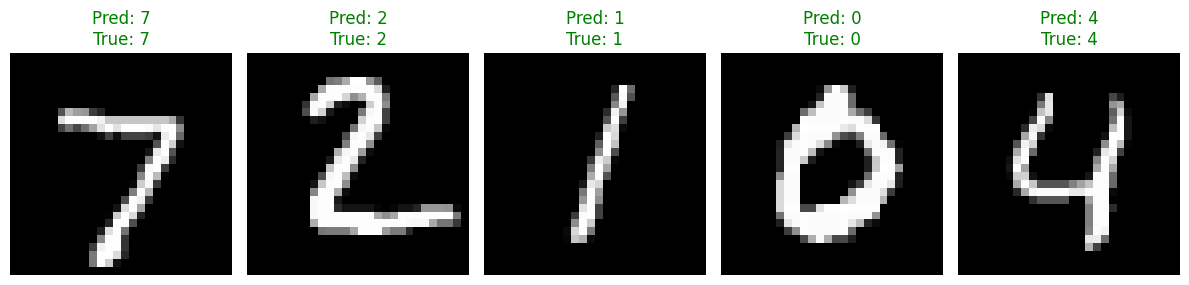

In [ ]:
# ------------------------- 1. IMPORT REQUIRED LIBRARIES -------------------------

import tensorflow as tf  # TensorFlow for building and training deep learning models
import numpy as np       # NumPy for numerical operations and array handling
import matplotlib.pyplot as plt  # For visualizing images and model predictions

# For evaluating fairness across subgroups
import pandas as pd       # To export evaluation data to CSV for slicing
import tensorflow_model_analysis as tfma  # Used for fairness-aware evaluation

# ------------------------- 2. LOAD AND NORMALIZE MNIST DATA -------------------------

# Load the MNIST dataset: Contains 60,000 training and 10,000 test grayscale digit images (28x28)
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1] range (from 0–255) for faster and more stable model training
X_train, X_test = X_train / 255.0, X_test / 255.0

# ------------------------- 3. SIMULATE BIASED SUBGROUPS (E.G., ELDERLY HANDWRITING) -------------------------

# Create a data augmentation pipeline to simulate noisy or shaky handwriting
# This represents how digits might appear when written by elderly or under poor conditions
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.Reshape((28, 28, 1)),           # Add channel dimension for convolution
    tf.keras.layers.RandomRotation(0.15),           # Slight rotation simulates shaky writing
    tf.keras.layers.RandomTranslation(0.1, 0.1),     # Slight position shift simulates writing errors
    tf.keras.layers.Reshape((28, 28))               # Reshape back to original shape
])

# Apply augmentation to first 10,000 training samples (simulate a subgroup)
X_train_augmented = data_augmentation(X_train[:10000])
y_train_augmented = y_train[:10000]  # Corresponding labels stay the same

# Combine original and augmented training data
# This gives the model exposure to both clean and distorted (simulated elderly) handwriting
X_train_combined = np.concatenate([X_train, X_train_augmented])
y_train_combined = np.concatenate([y_train, y_train_augmented])

# ------------------------- 4. BUILD THE CNN MODEL -------------------------

# Define the model architecture using Keras Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),  # Add channel dimension

    # First convolutional layer: Detects edges, corners, and textures
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),

    # Max pooling layer: Reduces spatial size while keeping important features
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Flatten feature maps to 1D for input to dense layers
    tf.keras.layers.Flatten(),

    # Fully connected hidden layer: Learns abstract representations
    tf.keras.layers.Dense(128, activation='relu'),

    # Output layer: 10 neurons (digits 0–9), softmax returns probabilities
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model: Specify optimizer, loss, and evaluation metric
model.compile(
    optimizer='adam',  # Adam optimizer adjusts learning rate dynamically
    loss='sparse_categorical_crossentropy',  # Suitable for integer class labels
    metrics=['accuracy']  # Report accuracy during training and evaluation
)

# ------------------------- 5. TRAIN THE MODEL -------------------------

# Train for 5 full passes (epochs) through the training dataset
# validation_split=0.2 keeps 20% of the data for validation accuracy tracking
history = model.fit(
    X_train_combined, y_train_combined,
    epochs=5,
    validation_split=0.2,
    verbose=1  # Show detailed progress during training
)

# ------------------------- 6. EVALUATE ON TEST DATA -------------------------

# Evaluate the trained model on the test set (unseen digits)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest accuracy: {test_acc:.4f}")  # Expected to be around 97–99%

# ------------------------- 7. MAKE AND VISUALIZE PREDICTIONS -------------------------

# Select the first 5 test images for prediction visualization
predictions = model.predict(X_test)


# Convert predicted probability distributions to class labels (0–9)
predicted_labels = np.argmax(predictions, axis=1)

# Create a 1-row plot with 5 subplots showing images and predicted labels
plt.figure(figsize=(12, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(sample_images[i], cmap='gray')  # Display grayscale image

    # Set label color based on correctness of prediction
    title_color = 'green' if predicted_labels[i] == y_test[i] else 'red'
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {y_test[i]}", color=title_color)
    plt.axis('off')  # Hide axis ticks

# Optimize layout, save to file, and display the result
plt.tight_layout()
plt.savefig('mnist_predictions.png', dpi=1000)
plt.show()

# ------------------------- 8. EXPORT EVALUATION DATA FOR FAIRNESS METRICS -------------------------

# Simulate a subgroup feature (e.g., 'age_group') for bias analysis
# In real-world data, this could be gender, age, or region
eval_data = []
for i in range(len(X_test)):
    age_group = 'elderly' if i % 2 == 0 else 'young'  # Alternate label for demo
    eval_data.append({
        'image': X_test[i].flatten().tolist(),        # Flatten image for export
        'label': int(y_test[i]),                      # True digit
        'age_group': age_group,                       # Simulated protected attribute
        'prediction': int(np.argmax(predictions[i]))  # Model's predicted digit
    })

# Export evaluation data to CSV file (used by TensorFlow Model Analysis)
pd.DataFrame(eval_data).to_csv("mnist_eval_data.csv", index=False)




Troubleshooting Challenge

Great! Let’s debug the buggy TensorFlow script step by step.

---

##  **Goal of the Script**

Train a neural network to classify handwritten digits (0–9) from the MNIST dataset using TensorFlow/Keras.

---

## 🔍 **Bug #1: Incorrect Output Dimension**

### ❌ Buggy Line:

```python
Dense(5, activation='sigmoid')
```

###  Explanation:

* MNIST digits are **10 classes** (0 to 9).
* The output layer should have **10 neurons** to represent the 10 classes.
* `sigmoid` is more appropriate for binary classification or multi-label tasks, not multi-class.

### ✅ Fix:

Change to `Dense(10, activation='softmax')`:

```python
Dense(10, activation='softmax')
```

 *Why softmax?*

* It turns the 10 outputs into a probability distribution over the 10 classes.

---

## 🔍 **Bug #2: Wrong Loss Function**

### ❌ Buggy Line:

```python
loss='mean_squared_error'
```

###  Explanation:

* This is a **classification** problem, not regression.
* `mean_squared_error` is used for continuous output.
* Labels (`y_train`, `y_test`) are integers (e.g., `7`, `3`, `1`), not one-hot vectors.

### ✅ Fix:

Use `sparse_categorical_crossentropy`:

```python
loss='sparse_categorical_crossentropy'
```
*Why sparse\_categorical\_crossentropy?*

* It supports integer labels and internally handles the one-hot encoding.
* It's designed for multi-class classification.

---

## ✅ Corrected Code

```python
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize input data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Corrected Model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # ✅ Fixed output dimension and activation
])

# Corrected loss function for classification
model.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',  # ✅ Correct loss
    metrics=['accuracy']
)

# Train model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate
model.evaluate(x_test, y_test)
```

---

## 🧪 Expected Output

After 5 epochs, the validation accuracy should be seen rising (usually \~98%+ eventually for MNIST). The model now:

* Outputs 10 probabilities (one for each digit),
* Uses a proper loss function,
* Should no longer raise dimension or shape mismatch errors.




#Bonus Task: Streamlit Deployment

In [1]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.1 MB/s eta 0:00:00


In [9]:
# app.py
# Streamlit web app to deploy the MNIST digit classifier

import streamlit as st
import tensorflow as tf
import numpy as np
from PIL import Image, ImageOps
import io

st.set_page_config(page_title="MNIST Digit Classifier", layout="centered")

st.title("🖌️ MNIST Digit Classifier")
st.markdown(
    "Upload a handwritten digit image (PNG or JPG), and the model will predict which digit it is!"
)

# Load (or train) the model
@st.cache_resource
def load_model():
    model = tf.keras.models.load_model('mnist_model.h5', compile=False)
    # Compile for evaluation/prediction
    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )
    return model

model = load_model()

# Function to preprocess uploaded image
def preprocess_image(image: Image.Image) -> np.ndarray:
    # Convert to grayscale
    gray = ImageOps.grayscale(image)
    # Resize to 28x28
    resized = gray.resize((28, 28), Image.ANTIALIAS)
    # Invert colors (if necessary)
    # Common handwritten images are black on white background;
    # MNIST is white digit on black background. We invert if background is darker.
    arr = np.array(resized)
    if np.mean(arr) > 127:
        arr = 255 - arr
    # Normalize
    arr = arr.astype('float32') / 255.0
    # Expand dims to (1,28,28)
    return arr.reshape(1, 28, 28)

# File uploader
uploaded_file = st.file_uploader("Choose an image...", type=["png", "jpg", "jpeg"])

if uploaded_file is not None:
    # Read image
    image = Image.open(uploaded_file).convert('RGB')
    st.image(image, caption='Uploaded Image', use_column_width=True)

    # Preprocess and predict
    data = preprocess_image(image)
    logits = model.predict(data)
    pred = np.argmax(logits, axis=1)[0]

    st.write(f"## Predicted Digit: **{pred}**")
    st.bar_chart(logits[0])

# Option to test on random MNIST test image
if st.checkbox("Test on a random MNIST test sample"):
    # Load MNIST test set
    (_, _), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
    idx = np.random.randint(0, X_test.shape[0])
    sample = X_test[idx]
    true = y_test[idx]
    st.write(f"### True Label: {true}")
    st.image(sample, width=150, clamp=True)

    sample_input = sample.reshape(1, 28, 28) / 255.0
    logits = model.predict(sample_input)
    pred = np.argmax(logits, axis=1)[0]
    st.write(f"### Predicted: **{pred}**")
    st.bar_chart(logits[0])

st.markdown("---")
st.write("Built with TensorFlow & Streamlit ")


2025-06-17 17:02:36.526 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 17:02:36.539 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 17:02:36.541 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 17:02:36.541 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 17:02:36.542 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 17:02:36.549 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 17:02:36.553 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 17:02:36.554 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar